<a href="https://colab.research.google.com/github/jaidatta71/ML---Berkeley/blob/main/colab_activity7_2%20-%20Optimizing%20L2%20Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Self-Study Colab Activity 7.2: Defining, Computing, and Optimizing Loss

**Expected Time = 60 Minutes**


This activity focuses on computing and minimizing the L2 loss for different values of theta and identifying the theta that minimizes the L2 loss.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

### The Dataset

The geyser data from seaborn is loaded below.  You are to  build a model using the waiting time to predict the geyser explosion duration.

Note that this model will not have an intercept term.  

In [ ]:
geyser = sns.load_dataset('geyser')

In [ ]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


[Back to top](#Index:)

## Problem 1

### Creating an array of $\theta$'s


Below, create an array of 100 equally spaced values between -1 and 1.  Use the `np.linspace` method demonstrated in the lectures and assigned your answer as a numpy array to `thetas` below.

In [ ]:
thetas = np.linspace(-1, 1, 100)

# Answer check
print(type(thetas))
print(thetas.shape)
thetas

<class 'numpy.ndarray'>
(100,)


array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

[Back to top](#Index:)

## Problem 2

### The Model



In this assignment, our model takes the form:

$$\text{duration} = \text{waiting} \times \theta$$

Multiply the values in the `waiting` column of the `geyser` dataset by `0.8` to create a prediction for the case of $\theta = 0.8$. Assign them as a Series to the variable `prediction` below.

In [ ]:


prediction = geyser['waiting']*0.8

# Answer check
print(type(prediction))
print(prediction.shape)
prediction

<class 'pandas.core.series.Series'>
(272,)


,waiting
0,63.2
1,43.2
2,59.2
3,49.6
4,68.0
...,...
267,64.8
268,36.8
269,72.0
270,36.8


from sklearn.metrics import mean_squared_error
mean_squared_error(geyser['duration'], linreg.predict(geyser[['waiting']]))[Back to top](#Index:)

## Problem 3

### Determining Mean Squared Error




Use the `mean_squared_error` function to calculate the MSE between the `duration` column of the `geyser` DataFrame and the `0.8*geyser['waiting']` data.

Use the function `float` to convert your result to floats.

Assign your result as a float to `mse` below.

In [ ]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(geyser['duration'], linreg.predict(geyser[['waiting']]))

mse = mean_squared_error(geyser['duration'], prediction)

# Answer check
print(type(mse))
print(mse)

<class 'float'>
2930.2861285845593


[Back to top](#Index:)

## Problem 4

### Computing the Mean Squared Error for `thetas`



Use a `for` loop over `thetas` to compute the MSE between the column `geyser['duration']` and the column `geyser['waiting']`multiplied by each value of `theta`.  Assign these values in order to the list `mses` below.

In [ ]:
mses = []
for i in thetas:
    k=mean_squared_error(geyser['duration'], geyser['waiting']*i)
    mses.append([k, i])

# Answer check
print(type(mses))
print(len(mses))
print(mses[:4])
print(mses)

<class 'list'>
100
[[5746.399297702205, -1.0], [5527.445557830223, -0.9797979797979798], [5312.744883371734, -0.9595959595959596], [5102.29727432674, -0.9393939393939394]]
[[5746.399297702205, -1.0], [5527.445557830223, -0.9797979797979798], [5312.744883371734, -0.9595959595959596], [5102.29727432674, -0.9393939393939394], [4896.102730695238, -0.9191919191919192], [4694.161252477228, -0.898989898989899], [4496.472839672713, -0.8787878787878788], [4303.037492281691, -0.8585858585858586], [4113.855210304161, -0.8383838383838383], [3928.925993740124, -0.8181818181818181], [3748.2498425895824, -0.797979797979798], [3571.8267568525325, -0.7777777777777778], [3399.6567365289766, -0.7575757575757576], [3231.7397816189127, -0.7373737373737373], [3068.0758921223423, -0.7171717171717171], [2908.6650680392668, -0.696969696969697], [2753.507309369682, -0.6767676767676767], [2602.6026161135924, -0.6565656565656566], [2455.9509882709954, -0.6363636363636364], [2313.552425841892, -0.6161616161616161]

[Back to top](#Index:)

## Problem 5

### Which $\theta$ minimizes Mean Squared Error



Using the list of `mses`, determine the value for $\theta$ that minimized the mean squared error.  You may want to amend your loop above to check for the smallest value as the loop proceeds.  Assign your answer as a float to `theta_min` below.

In [ ]:
min_pair_first_element = min(mses, key=lambda pair: pair[0])
print(f"Minimum pair based on first element: {min_pair_first_element}")

min_mse = min_pair_first_element[0]
theta_min = min_pair_first_element[1]

# Answer check
print(type(theta_min))
print(min_mse)
print(theta_min)

Minimum pair based on first element: [0.3695626511606713, 0.05050505050505061]
<class 'numpy.float64'>
0.3695626511606713
0.05050505050505061


Note that, again, the shape of the Mean Squared Error is a parabola.  The plot below shows the values of thetas againt their mean squared error.  

<center>
    <img src = 'images/mse_min.png' >
</center>

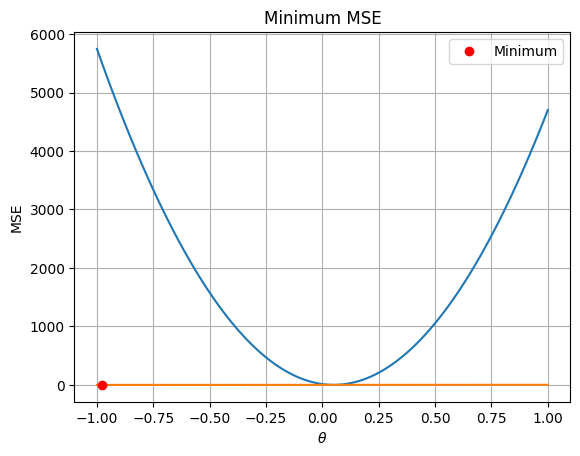

In [ ]:
#Code for Plot
#fig = px.line(x = thetas, y = mses, title = 'Mean Squared Error')
#fig.update_layout(xaxis_title = r'$\theta$', yaxis_title = 'MSE', font_size=20)
#fig.show()

plt.plot(thetas, mses)
plt.plot(thetas[np.argmin(mses[0])], min(mses[0]), 'ro', label = 'Minimum')
plt.legend()
plt.title('Minimum MSE')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
plt.grid();
#plt.savefig('images/mse_min.png')

In [ ]:
# finds minimum MSE
# Use the minimize function that has been imported from scipy.optimize to find the minimum value of "l2_loss" FUNCTION using x0 = 4
# Next, use the minimum_theta.x attribute to examine the lowest value
# One way to identify is by using scipy.optimize import minimize
# 2nd way by plotting

def l2_loss(theta):
    return np.mean((y-theta*x)**2)

minimum_theta = minimize(l2_loss, x0=4)
theta_solution = minimum_theta.x  # or   theta_solution = minimum_theta.x[0]........here the type in the former case is array in later it is float64

#px.lin(x=np.linespace(-4,2,1000), y=function(np.linspace(-4,2,1000)))

plt.plot(thetas, [l2_loss(i) for i in thetas])
plt.plot(theta_solution, l2_loss(theta_solution), 'ro', label = f'solution: {np.round(theta_solution[0], 3)}')
plt.legend();
plt.title(r'Minimizing Mean Squared Error given $\theta$');
plt.xlabel(r'$\theta$')
plt.ylabel('MSE');


NameError: name 'y' is not defined

### Calculating MSE & MAE ###
-- Complete the mae & mse function below that takes in a value for  𝜃
--Your function should compute and return the mean absolute error based on the --model  𝑦=𝜃∗𝑥


In [ ]:
def mae_loss(theta):
    return np.mean(abs(theta*x-y))
def mse_loss(theta):
    return np.mean((y-theta*x)**2)

mae = mae_loss(8)
print(mae)
print(type(mae))
mse = mse_loss(8)
print(mse)
print(type(mse))

-- Use the minimize function imported from scipy.optimize to determine the value for mae_loss that minimizes the Mean Absolute Error & MSE loss function starting at x0 = 4. Assign this result to minimum_theta.

--Next, use the minimum_theta.x[0] attribute to assign the solution as a float to theta_mae below.

In [ ]:
### GRADED
minimum_theta = ''
theta_mae = ''

# YOUR CODE HERE
minimum_theta = minimize(mae_loss, x0=4)
theta_mae = minimum_theta.x[0]

minimum_theta = ''

minimum_theta = minimize(mse_loss, x0=4)
theta_mse = minimum_theta.x[0]

# Answer check
print(type(theta_mae))
print(theta_mae)
print(type(theta_mse))
print(theta_mse)

thetas = np.linspace(-1, 5, 1000)
plt.plot(thetas, [mae_loss(i) for i in thetas])
plt.plot(theta_mae, mae_loss(theta_mae), 'ro', label = f'solution: {np.round(theta_mae[0], 3)}')
plt.legend();
plt.title(r'Minimizing Mean Absolute Error given $\theta$');
plt.xlabel(r'$\theta$')
plt.ylabel('MAE');

thetas = np.linspace(-1, 5, 1000)
plt.plot(thetas, [mse_loss(i) for i in thetas])
plt.plot(theta_mse, mse_loss(theta_mse), 'ro', label = f'solution: {np.round(theta_mse[0], 3)}')
plt.legend();
plt.title(r'Minimizing Mean Squared Error given $\theta$');
plt.xlabel('theta')
plt.ylabel('MSE');